In [1]:
import h5py
import scipy
import numpy as np
import torch
base_dir = "/home/mafzhang/code/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/Chesapeake/"
label = np.load("/home/mafzhang/data/Chesapeake/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/Chesapeake/8d/true_masks.npy")
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()

In [2]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))
mae_our_wo = ((np.abs(prediction_our_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our_wo))

mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg))
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg_wo))

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer))
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer_wo))

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer))
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer_wo))

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn))
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn_wo))

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer))
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer_wo))

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn))
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn_wo))

0.13301103
0.14293854
0.16022755321202545
0.15952552552646165
0.14120476
0.16375047
0.14169791
0.1651266
0.15232936
0.16508904
0.137922
0.16772293
0.13824873
0.14234453


In [3]:
mae_our[mae_our==0]=np.nan
mae_our_wo[mae_our_wo==0]=np.nan
mae_xg_wo[mae_xg_wo==0]=np.nan
mae_xg[mae_xg==0]=np.nan
mae_crossformer_wo[mae_crossformer_wo==0]=np.nan
mae_crossformer[mae_crossformer==0]=np.nan
mae_mtgnn_wo[mae_mtgnn_wo==0]=np.nan
mae_mtgnn[mae_mtgnn==0]=np.nan
mae_tsmixer_wo[mae_tsmixer_wo==0]=np.nan
mae_tsmixer[mae_tsmixer==0]=np.nan
mae_iTransformer_wo[mae_iTransformer_wo==0]=np.nan
mae_iTransformer[mae_iTransformer==0]=np.nan
mae_predrnn_wo[mae_predrnn_wo==0]=np.nan
mae_predrnn[mae_predrnn==0]=np.nan

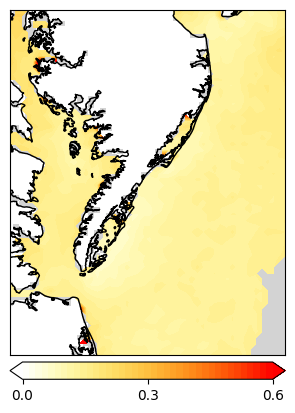

In [ ]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")
mae_xg_sp = deepcopy(mae_predrnn_wo.numpy())
tmp = np.zeros_like(is_sea).astype(float)
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_xg_sp

chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy")
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.3, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.3, 100), ticks=np.linspace(0, 0.3, 3),location='bottom')

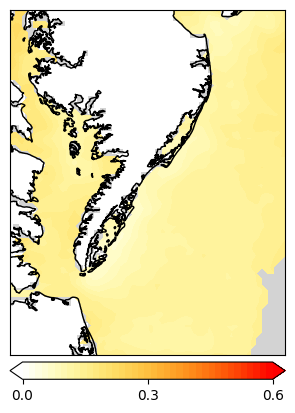

In [6]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")
mae_xg_sp = deepcopy(mae_our.numpy())
tmp = np.zeros_like(is_sea).astype(float)
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_xg_sp

chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy")
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.3, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.3, 100), ticks=np.linspace(0, 0.3, 3),location='bottom')

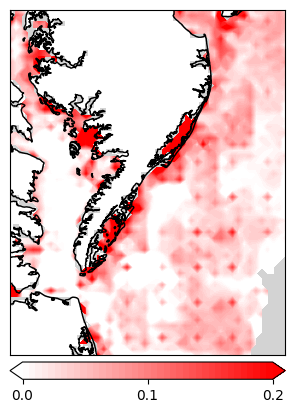

In [7]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('chrisluts:I_Red').to_mpl()
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")
improvement =  (mae_predrnn_wo.numpy() - mae_our.numpy())/mae_predrnn_wo.numpy()
tmp = np.zeros_like(is_sea).astype(float)
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= improvement


chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy")
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, tmp, levels=np.linspace(0, 0.2, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.2, 100), ticks=np.linspace(0, 0.2, 3),location="bottom")

/tmp/ipykernel_2735179/4080664675.py:20: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(chla,0)


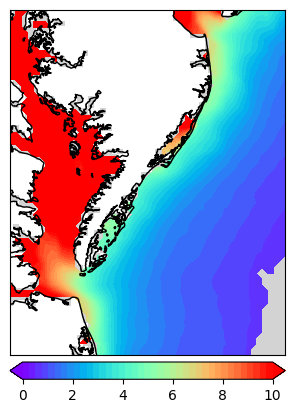

In [10]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('chrisluts:i_green').to_mpl()
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")

chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy").astype(float)
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")
raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
time = np.array(raw_data['Time_start']).squeeze()
time = time - time[0]
time = time%365

mean = np.nanmean(chla,0)
mean[~is_sea.astype(bool)]=np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, mean, levels=np.linspace(0, 10, 40),cmap="rainbow",extend='both')
map.colorbar(boundaries=np.linspace(0, 10, 100), ticks=np.linspace(0, 10, 6),location="bottom")

/tmp/ipykernel_2735179/1091530894.py:22: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(chla,0)


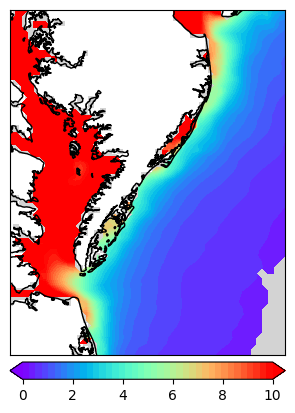

In [8]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('chrisluts:i_green').to_mpl()
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")

chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy").astype(float)
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")
raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
time = np.array(raw_data['Time_start']).squeeze()
time = time - time[0]
time = time%365
index = np.bitwise_and(time>150, time<241)
chla=chla[index[:chla.shape[0]]]

mean = np.nanmean(chla,0)
mean[~is_sea.astype(bool)]=np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, mean, levels=np.linspace(0, 10, 40),cmap="rainbow",extend='both')
map.colorbar(boundaries=np.linspace(0, 10, 100), ticks=np.linspace(0, 10, 6),location="bottom")

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")


/tmp/ipykernel_2735179/3450618372.py:22: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(chla,0)


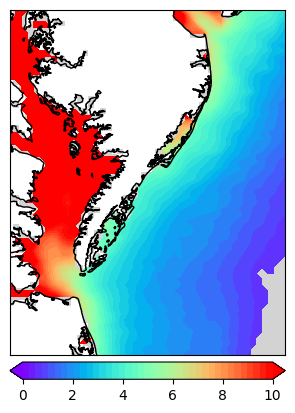

In [9]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('chrisluts:i_green').to_mpl()
is_sea = np.load("/home/mafzhang/data/Chesapeake/8d/is_sea.npy")

chla = np.load("/home/mafzhang/data/Chesapeake/8d/chla.npy").astype(float)
lon = np.load("/home/mafzhang/data/Chesapeake/8d/lon.npy")
lati = np.load("/home/mafzhang/data/Chesapeake/8d/lati.npy")
raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
time = np.array(raw_data['Time_start']).squeeze()
time = time - time[0]
time = time%365
index = np.bitwise_or(time<59, time>334)
chla=chla[index[:chla.shape[0]]]

mean = np.nanmean(chla,0)
mean[~is_sea.astype(bool)]=np.nan


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(lon, lati, mean, levels=np.linspace(0, 10, 40),cmap="rainbow",extend='both')
map.colorbar(boundaries=np.linspace(0, 10, 100), ticks=np.linspace(0, 10, 6),location="bottom")